## Classifying Species of Bird images using ResNets, CNN and Data Augmentation in PyTorch

So in this Course project I'll be classifying the species of various birds by training a set of data available in the dataset using ResNets and CNN model, then validating the data and when the data has been trained and I will try to predict the birds given in test dataset, with an accuracy around 86%. 

# course-project

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="course-project")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/abhishekdinesh21042001/course-project


'https://jovian.ai/abhishekdinesh21042001/course-project'

In [5]:
import os
import torch
import torchvision
import tarfile
from torch.utils.data import random_split
!pip install opendatasets --upgrade
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as T
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [6]:
from PIL import Image
from pathlib import Path
import pandas as pd
import math
import cv2
from scipy import signal
import seaborn as sns

In [7]:
project_name='course-project'

#Dataset

For this course project I made use of 100-bird-species dataset which is available on Kaggle which contains 275 species of birds across the world. Data set of 275 bird species. 39364 training images, 1375 test images(5 per species) and 1375 validation images(5 per species.
All images are 224 X 224 X 3 color images in jpg format. Data set includes a train set, test set and validation set. Each set contains 275 sub directories, one for each bird species. Then the images are resized to 128 x 128 x 3 color images , converted into tensors and then normalised using mean and standard deviation.

In [8]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/gpiosenka/100-bird-species'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abhishekd2001
Your Kaggle Key: ··········


  1%|          | 5.00M/889M [00:00<00:26, 35.4MB/s]

100%|██████████| 889M/889M [00:11<00:00, 79.3MB/s]


In [9]:
import os

data_dir = './100-bird-species'
print(os.listdir(data_dir))

['birds.csv', 'valid', 'train', 'test']


In [10]:

classes = os.listdir(data_dir + "/train")
print(classes)
print(len(classes))

['MAGPIE GOOSE', 'FLAMINGO', 'AMERICAN BITTERN', 'WHITE CHEEKED TURACO', 'COMMON POORWILL', 'STEAMER DUCK', 'CALIFORNIA QUAIL', 'LARK BUNTING', 'BLACK-NECKED GREBE', 'MIKADO  PHEASANT', 'BALI STARLING', 'PURPLE GALLINULE', 'LONG-EARED OWL', 'OSTRICH', 'EASTERN MEADOWLARK', 'BLACK SKIMMER', 'AMERICAN KESTREL', 'BARN SWALLOW', 'OCELLATED TURKEY', 'WILSONS BIRD OF PARADISE', 'VICTORIA CROWNED PIGEON', 'CUBAN TODY', 'CHIPPING SPARROW', 'OYSTER CATCHER', 'ROYAL FLYCATCHER', 'JABIRU', 'CROW', 'BLACK-THROATED SPARROW', 'GUINEA TURACO', 'BEARDED BARBET', 'CEDAR WAXWING', 'SWINHOES PHEASANT', 'BLACK SWAN', 'PYGMY KINGFISHER', 'NORTHERN MOCKINGBIRD', 'GANG GANG COCKATOO', 'SHOEBILL', 'GAMBELS QUAIL', 'RING-NECKED PHEASANT', 'HAWAIIAN GOOSE', 'PARADISE TANAGER', 'TAKAHE', 'OKINAWA RAIL', 'GREEN JAY', 'EMU', 'HOOPOES', 'HORNBILL', 'RED FACED CORMORANT', 'AMERICAN AVOCET', 'ANTBIRD', 'GREAT POTOO', 'ROCK DOVE', 'KIWI', 'GOLD WING WARBLER', 'EURASIAN GOLDEN ORIOLE', 'DOWNY WOODPECKER', 'CASSOWARY', 

#Exploring the data

In [11]:
for cls in classes:
  train_images = os.listdir(data_dir + '/train/' + cls)
  img_count = len(train_images)
  print("Number of images belonging to {} is {}".format(cls, img_count))

Number of images belonging to MAGPIE GOOSE is 142
Number of images belonging to FLAMINGO is 122
Number of images belonging to AMERICAN BITTERN is 170
Number of images belonging to WHITE CHEEKED TURACO is 153
Number of images belonging to COMMON POORWILL is 161
Number of images belonging to STEAMER DUCK is 109
Number of images belonging to CALIFORNIA QUAIL is 115
Number of images belonging to LARK BUNTING is 117
Number of images belonging to BLACK-NECKED GREBE is 137
Number of images belonging to MIKADO  PHEASANT is 146
Number of images belonging to BALI STARLING is 132
Number of images belonging to PURPLE GALLINULE is 128
Number of images belonging to LONG-EARED OWL is 106
Number of images belonging to OSTRICH is 123
Number of images belonging to EASTERN MEADOWLARK is 190
Number of images belonging to BLACK SKIMMER is 111
Number of images belonging to AMERICAN KESTREL is 130
Number of images belonging to BARN SWALLOW is 132
Number of images belonging to OCELLATED TURKEY is 118
Number o

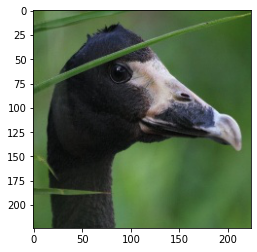

In [12]:
image1 = Image.open('./100-bird-species/train/'+classes[0]+'/122.jpg')
plt.imshow(image1,)

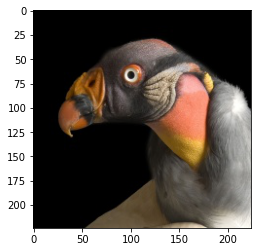

In [13]:
image1 = Image.open('./100-bird-species/train/'+classes[100]+'/122.jpg')
plt.imshow(image1)

In [14]:
train_count = []
species = []
for cls in classes:
  train_images = os.listdir(data_dir + '/train/' + cls)
  train_img_count = len(train_images)
  species.append(cls)
  train_count.append(train_img_count)
train_count

[142,
 122,
 170,
 153,
 161,
 109,
 115,
 117,
 137,
 146,
 132,
 128,
 106,
 123,
 190,
 111,
 130,
 132,
 118,
 126,
 146,
 122,
 115,
 207,
 142,
 143,
 107,
 168,
 162,
 160,
 180,
 217,
 112,
 173,
 140,
 142,
 175,
 147,
 152,
 113,
 176,
 108,
 107,
 156,
 106,
 125,
 122,
 127,
 179,
 150,
 138,
 132,
 138,
 128,
 135,
 127,
 114,
 135,
 126,
 155,
 155,
 164,
 137,
 135,
 142,
 125,
 156,
 155,
 135,
 106,
 176,
 114,
 144,
 135,
 167,
 144,
 184,
 143,
 127,
 107,
 155,
 233,
 166,
 194,
 117,
 127,
 186,
 140,
 120,
 126,
 136,
 127,
 130,
 151,
 154,
 120,
 130,
 167,
 107,
 155,
 136,
 160,
 124,
 132,
 128,
 177,
 157,
 141,
 144,
 127,
 121,
 123,
 161,
 131,
 130,
 131,
 163,
 141,
 147,
 122,
 144,
 158,
 127,
 136,
 149,
 109,
 116,
 103,
 160,
 144,
 128,
 124,
 128,
 138,
 119,
 137,
 151,
 137,
 233,
 213,
 113,
 176,
 112,
 147,
 154,
 153,
 175,
 194,
 149,
 122,
 129,
 156,
 116,
 129,
 189,
 103,
 132,
 146,
 157,
 103,
 145,
 113,
 214,
 146,
 135,
 168,
 124

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


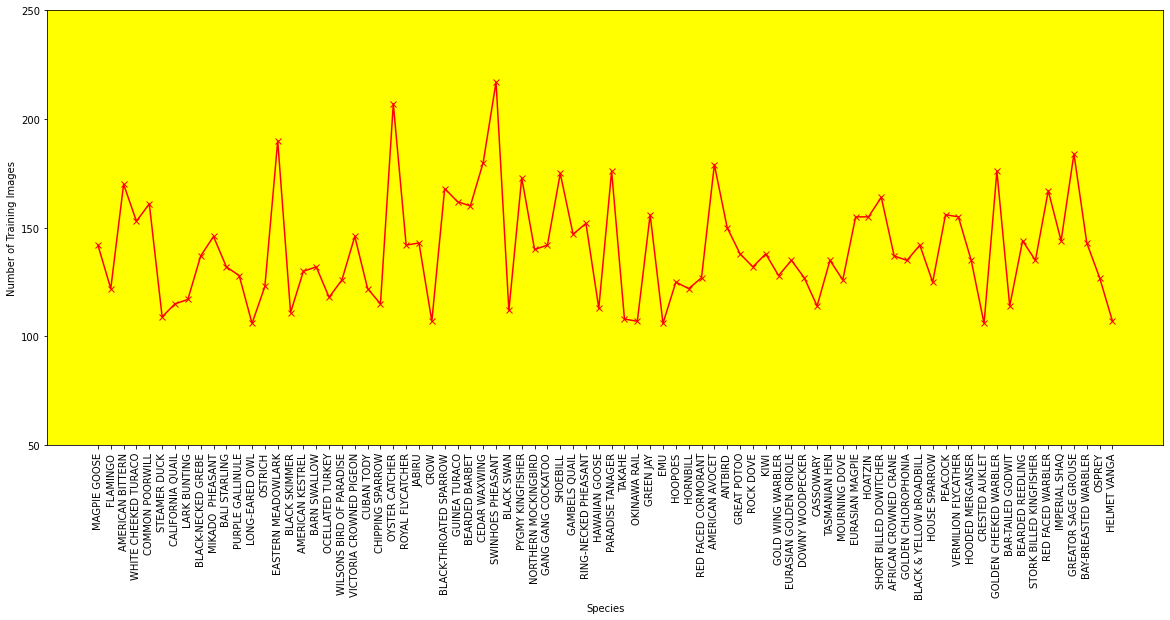

In [15]:

plt.figure(figsize=(20,8))
plt.plot(species[:80], train_count[:80],'-rx', label='Train images')
plt.xticks(rotation=90)
plt.yticks([50,100,150,200,250])
ax = plt.axes()
ax.set_facecolor('yellow')
plt.xlabel("Species")
plt.ylabel("Number of Training Images")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


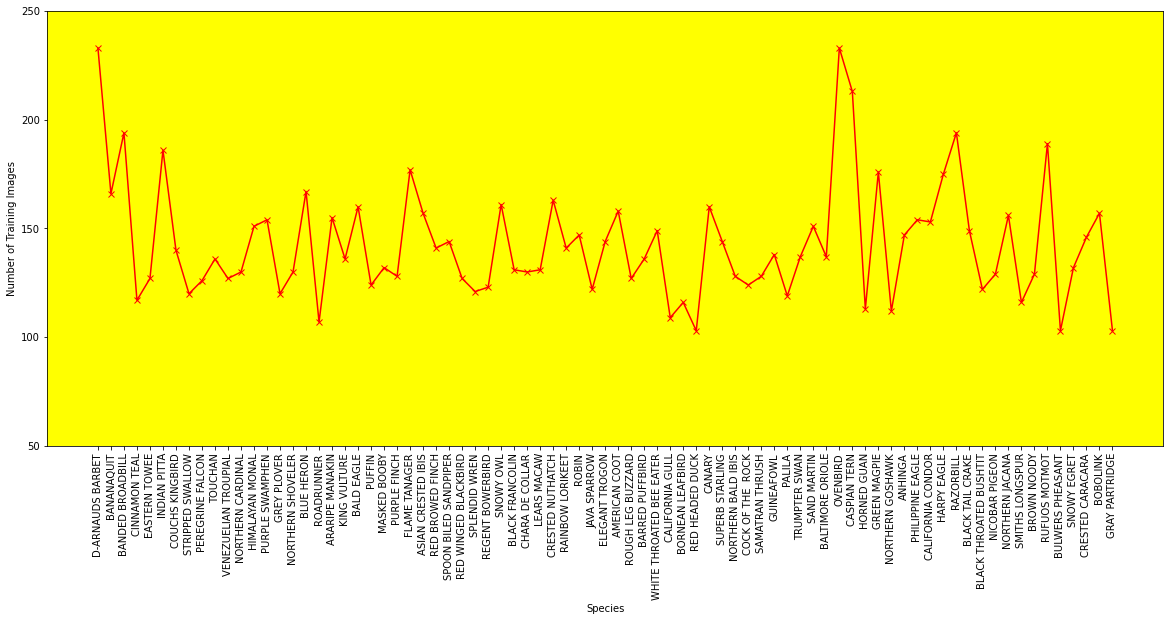

In [16]:
plt.figure(figsize=(20,8))
plt.plot(species[81:160], train_count[81:160],'-rx', label='Train images')
plt.xticks(rotation=90)
plt.yticks([50,100,150,200,250])
ax = plt.axes()
ax.set_facecolor('yellow')
plt.xlabel("Species")
plt.ylabel("Number of Training Images")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


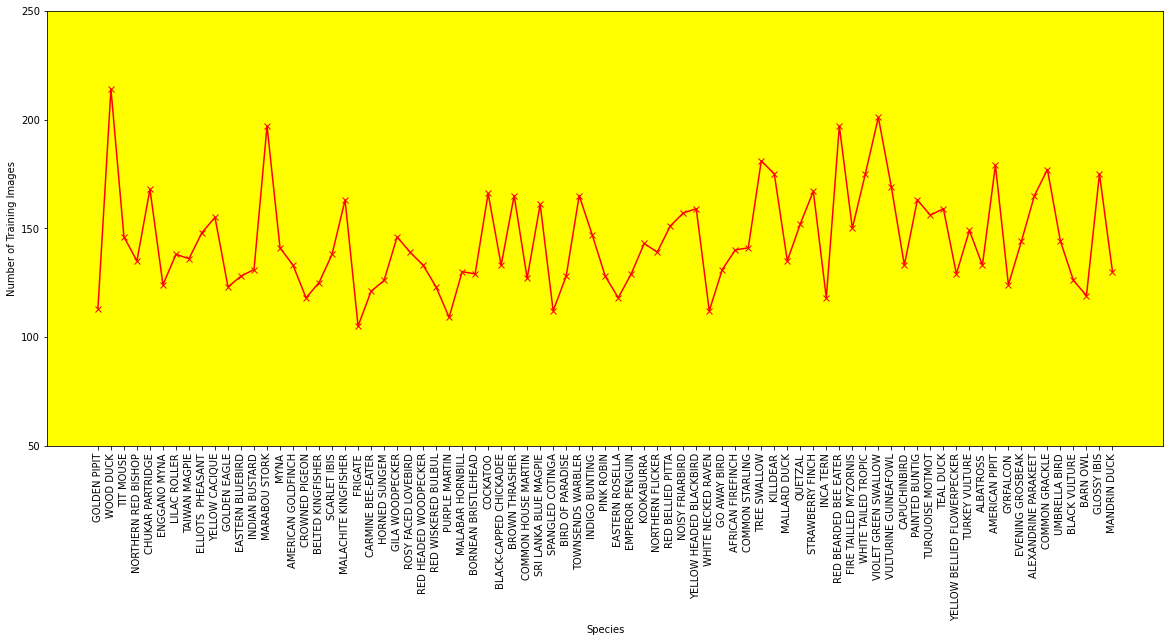

In [17]:
plt.figure(figsize=(20,8))
plt.plot(species[161:240], train_count[161:240],'-rx', label='Train images')
plt.xticks(rotation=90)
plt.yticks([50,100,150,200,250])
ax = plt.axes()
ax.set_facecolor('yellow')
plt.xlabel("Species")
plt.ylabel("Number of Training Images")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


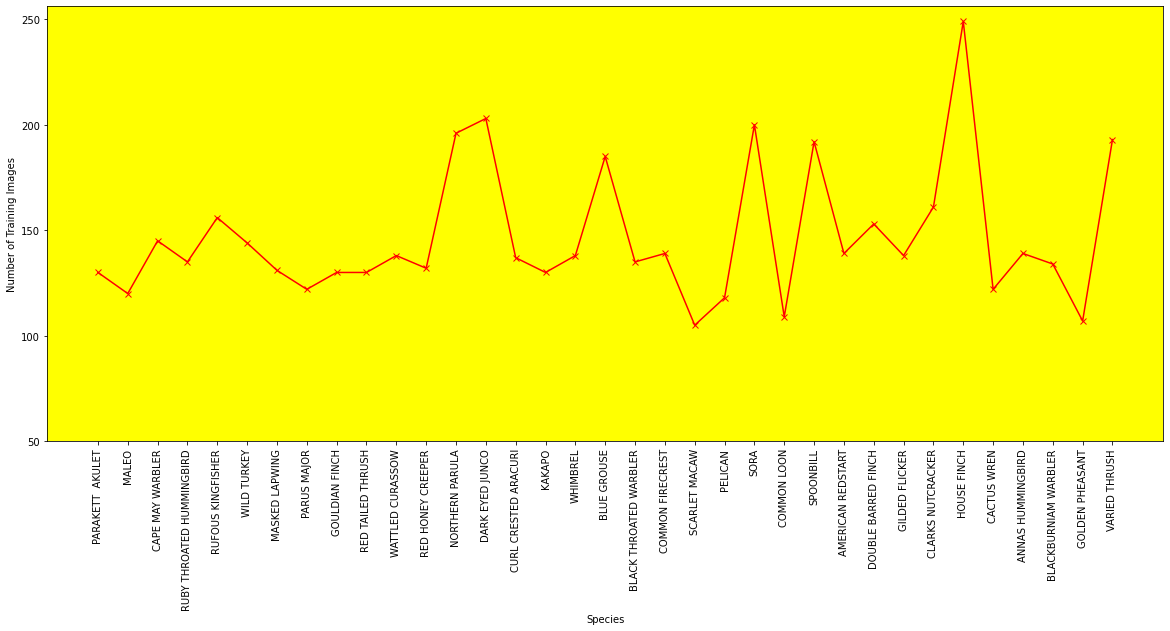

In [18]:
plt.figure(figsize=(20,8))
plt.plot(species[240:], train_count[240:],'-rx', label='Train images')
plt.xticks(rotation=90)
plt.yticks([50,100,150,200,250])
ax = plt.axes()
ax.set_facecolor('yellow')
plt.xlabel("Species")
plt.ylabel("Number of Training Images")
plt.show()

In [19]:
batch_size = 64
stats = [(0.5, 0.5, 0.5), (0.5, 0.5, 0.5)]

In [20]:
train_transform = T.Compose([T.RandomHorizontalFlip(),T.ToTensor(),T.Resize((128,128)),T.Normalize(*stats)])
valid_transform = T.Compose([T.ToTensor(),T.Resize((128,128)),T.Normalize(*stats)])

##Loading Train dataset and Valid dataset

In [21]:
train_ds = ImageFolder(data_dir + "/train",train_transform)
valid_ds = ImageFolder(data_dir + "/valid",valid_transform)

In [22]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [23]:
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

In [24]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xticks([]); ax.set_yticks([])
    denorm_images = denormalize(images, *stats)
    ax.imshow(make_grid(denorm_images[:nmax], nrow=8).permute(1, 2, 0).clamp(0,1))

def show_batch(dl, nmax=64):
    for images, labels in dl:
      print(images.shape,labels)
      show_images(images, nmax)
      break

##Shows a batch of 64 images from the train dataset

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([64, 3, 128, 128]) tensor([ 78, 204, 202, 265,  39,  42, 131,  69,  92,  96, 236, 198,  38,  44,
        267,  83,  13, 107,   9, 211,  39,  55,  54, 216, 141, 165,  55, 206,
         61,  59, 189, 231, 235,  54,  70, 148, 119, 255, 263,   0, 166,  58,
         74, 157,  58, 186,  33,  66, 173, 117, 253, 245,  11, 170,  94, 122,
         39, 122, 201, 187, 229, 217, 175,  96])


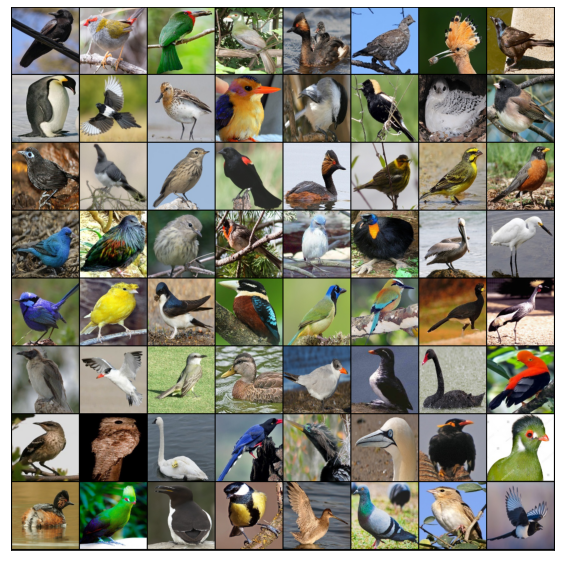

In [25]:
show_batch(train_dl)

In [26]:
len(classes)

275

In [27]:
!pip install jovian --upgrade --quiet

In [28]:
import jovian

In [29]:
jovian.commit(project=project_name, environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/abhishekdinesh21042001/course-project


'https://jovian.ai/abhishekdinesh21042001/course-project'

##Check for the available device

In [30]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [31]:
device = get_default_device()

In [32]:
device

device(type='cuda')

In [33]:
torch.cuda.empty_cache()

In [34]:
train_dl = DeviceDataLoader(train_dl,device)
valid_dl = DeviceDataLoader(valid_dl,device)

In [35]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

##Creating a Model using ResNet9

In [36]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        #self.conv1 = conv_block(in_channels, 64) #64x256x256
        self.conv2 = conv_block(in_channels, 128) #128x128x128
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))#128x128x128
        
        self.conv3 = conv_block(128, 256, pool=True)#256x64x64
        self.conv4 = conv_block(256, 512, pool=True)#512x32x32
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))#512x32x32

        self.conv5 = conv_block(512, 256, pool=True)#256x16x16
        self.conv6 = conv_block(256, 128, pool=True)#128x8x8
        self.conv7 = conv_block(128, 64, pool=True) #64x4x4
        self.res3 = nn.Sequential(conv_block(64, 64), conv_block(64, 64))#64x4x4
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(64, num_classes))
        
    def forward(self, xb):
        #out = self.conv1(xb)
        out = self.conv2(xb)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.conv7(out)
        out = self.res3(out) + out  
        out = self.classifier(out)
        return out

In [37]:
model = to_device(ResNet9(3,275), device)
print(model)

ResNet9(
  (conv2): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil

In [38]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [39]:
history = [evaluate(model, valid_dl)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[{'val_acc': 0.004261363763362169, 'val_loss': 5.618485450744629}]

In [40]:
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam 

In [41]:
jovian.commit(project=project_name, environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/abhishekdinesh21042001/course-project


'https://jovian.ai/abhishekdinesh21042001/course-project'

In [42]:
history += fit_one_cycle(2, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], last_lr: 0.00812, train_loss: 5.0394, val_loss: 4.2528, val_acc: 0.1039
Epoch [1], last_lr: 0.00000, train_loss: 3.2654, val_loss: 2.0958, val_acc: 0.5167


In [43]:
history += fit_one_cycle(10, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], last_lr: 0.00280, train_loss: 2.7608, val_loss: 2.2113, val_acc: 0.4236
Epoch [1], last_lr: 0.00760, train_loss: 2.6717, val_loss: 2.2216, val_acc: 0.4483
Epoch [2], last_lr: 0.01000, train_loss: 2.4594, val_loss: 2.7956, val_acc: 0.3542
Epoch [3], last_lr: 0.00950, train_loss: 2.1774, val_loss: 1.9970, val_acc: 0.5201
Epoch [4], last_lr: 0.00812, train_loss: 1.9581, val_loss: 1.2340, val_acc: 0.6707
Epoch [5], last_lr: 0.00611, train_loss: 1.7436, val_loss: 1.0912, val_acc: 0.7157
Epoch [6], last_lr: 0.00389, train_loss: 1.5268, val_loss: 0.8246, val_acc: 0.7639
Epoch [7], last_lr: 0.00188, train_loss: 1.2938, val_loss: 0.6078, val_acc: 0.8401
Epoch [8], last_lr: 0.00050, train_loss: 1.0753, val_loss: 0.5057, val_acc: 0.8642
Epoch [9], last_lr: 0.00000, train_loss: 0.9643, val_loss: 0.4891, val_acc: 0.8656


In [44]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

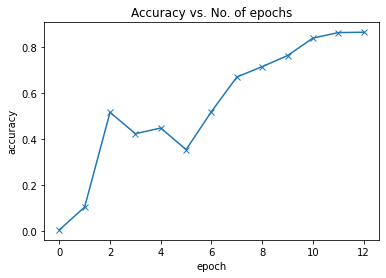

In [45]:
plot_accuracies(history)

In [46]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

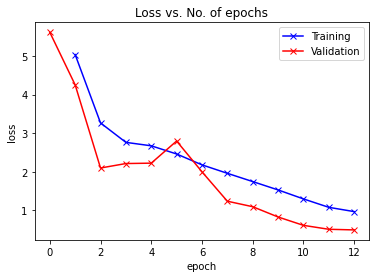

In [47]:
plot_losses(history)

In [48]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

Label: AFRICAN CROWNED CRANE , Predicted: AFRICAN CROWNED CRANE


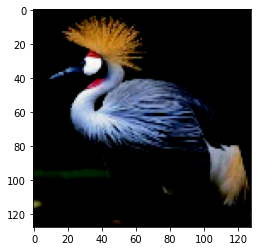

In [49]:
img, label = valid_ds[2]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: BANDED BROADBILL , Predicted: BANDED BROADBILL


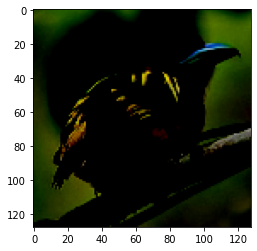

In [50]:
img, label = valid_ds[101]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

Label: GOLDEN PIPIT , Predicted: GOLDEN PIPIT


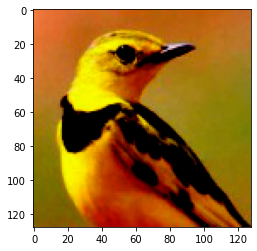

In [51]:
img, label = valid_ds[566]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model))

In [57]:
test_ds = ImageFolder('./100-bird-species/test', T.Compose([T.Resize([128,128]),
                                                    T.ToTensor(),
                                                    T.Normalize(*stats)]))
test_dl = DataLoader(test_ds, batch_size*2, num_workers=4, pin_memory=True)
test_dl = DeviceDataLoader(test_dl, device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [55]:
[evaluate(model, valid_dl)]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.8656295537948608, 'val_loss': 0.4891173839569092}]

In [58]:
[evaluate(model, test_dl)]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.8568779230117798, 'val_loss': 0.5362497568130493}]

In [59]:
jovian.reset()
jovian.log_hyperparams(arch='resnet9-modified', 
                       epochs=22, 
                       lr=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [60]:
jovian.commit(project=project_name, environment=None,outputs=['100-bird-species.pth'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...


[jovian] Error: Ignoring "100-bird-species.pth" (not found)


[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
Committed successfully! https://jovian.ai/abhishekdinesh21042001/course-project


'https://jovian.ai/abhishekdinesh21042001/course-project'

In [61]:
torch.save(model.state_dict(), '100-bird-species.pth')
